# Market Basket Analysis

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from itertools import combinations
from wordcloud import WordCloud

pd.options.display.max_rows = 1000

In [91]:
os.listdir("mba")

['Association_customer-recommendations.docx',
 'calculation.txt',
 'confidence.png',
 'Dataset.xlsx',
 'MBA_SYNOPSIS.docx',
 'Seminnartrial.xlsx',
 'support.png']

In [92]:
data = pd.read_excel("mba/Dataset.xlsx", header=None)

In [93]:
data.shape

(7501, 20)

In [94]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
#df.iloc[7497] #check the specific row data

In [96]:
all_items = []
for col in data.columns:
    all_items.extend(data[col].dropna().values)

In [97]:
all_items_text = " ".join([x.replace(" ", "_") for x in all_items])
word_cloud = WordCloud(width = 800, height = 800, collocations = False,
                       background_color = 'white').generate(all_items_text)

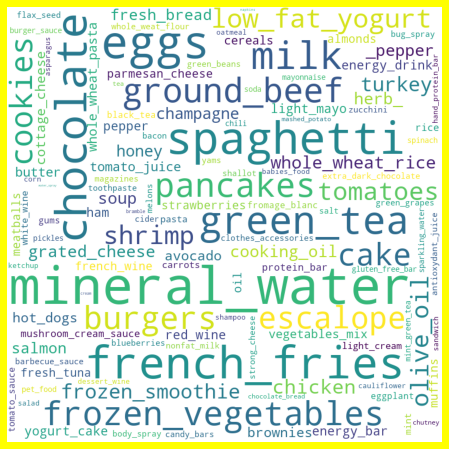

In [98]:
plt.figure(figsize = (8, 8), facecolor = "Yellow")
plt.imshow(word_cloud)
plt.axis("off")
 
plt.show()

In [99]:
dfz=pd.DataFrame()
dfz['all_items']=all_items
dfz['all_items'].value_counts()

mineral water           1788
eggs                    1348
spaghetti               1306
french fries            1282
chocolate               1230
green tea                991
milk                     972
ground beef              737
frozen vegetables        715
pancakes                 713
burgers                  654
cake                     608
cookies                  603
escalope                 595
low fat yogurt           574
shrimp                   536
tomatoes                 513
olive oil                494
frozen smoothie          475
turkey                   469
chicken                  450
whole wheat rice         439
grated cheese            393
cooking oil              383
soup                     379
herb & pepper            371
honey                    356
champagne                351
fresh bread              323
salmon                   319
brownies                 253
avocado                  250
hot dogs                 243
cottage cheese           239
tomato juice  

In [100]:
len(set(all_items))

119

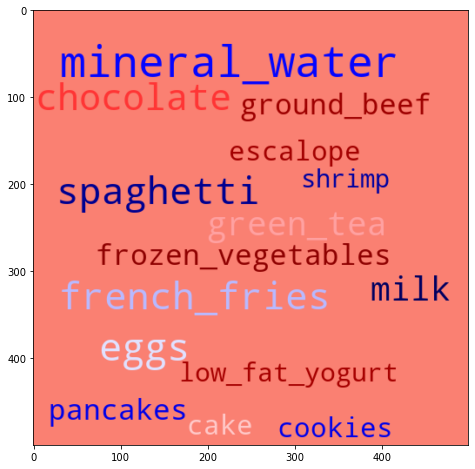

In [101]:
#change font_size, max_word and background_color
wordcloud = WordCloud(width=500, height=500, max_font_size=50, max_words=15, background_color="salmon",
                      colormap='seismic',random_state=1).generate(all_items_text)
plt.figure(figsize = (8, 8))
#Display the image
plt.imshow(wordcloud, interpolation="bilinear")
#plt.figure(figsize = (1, 1), facecolor = None)
#plt.figure(figsize=(400, 300))
#plt.figure()
#plt.margins(x=45, y=10)
#plt.axis("off")
plt.show()


## Data Preprocessing

In [102]:
orignial_count = [data.iloc[x, :].dropna().shape[0] for x in range(data.shape[0])]
unique_count = [data.iloc[x, :].dropna().unique().shape[0] for x in range(data.shape[0])]
# Python libraries for implementing frequent itemset mining and association rule mining algorithms. 

In [103]:
orignial_count1 = pd.Series(orignial_count)
unique_count1 = pd.Series(unique_count)
#converting Python lists into Pandas Series objects

In [104]:
duplicates = orignial_count1.compare(unique_count1)
duplicates.columns =['Original', 'Processed']
duplicates
#comparing two Pandas Series objects, original_count1 and unique_count1, using the compare() function of Pandas.


,Original,Processed
4394,8.0,7.0
4494,6.0,5.0
4526,6.0,5.0
6903,8.0,7.0
7109,8.0,7.0


##### We can see that transaction number 4394, 4494, 4526, 6903 and 7109 are having duplicate items in the transaction, lets print on of these transactions to verify the same

In [105]:
data.iloc[4394, :].dropna()
#This line of code selects row 4394 from the DataFrame data and drops any missing values in that row. It returns a pandas Series object that contains only the non-missing values in row 4394 of the original DataFrame data

0             burgers
1                 ham
2                eggs
3    whole wheat rice
4                 ham
5        french fries
6             cookies
7           green tea
Name: 4394, dtype: object

##### There are duplicate items in the transactions, lets remove these in order to avoid further problems and create frequent itemsets

##### ham is repeating twice

#### Let us remove these duplicate items from the transactions.

In [106]:
for val in duplicates.index.values:
    data.iloc[val, :] = pd.Series(data.iloc[val, :].unique()).reindex(range(20))
    #the code selects the corresponding row from the DataFrame data, and then converts the row into a Pandas Series object that contains only the unique non-missing values in the row.

In [107]:
data.iloc[4394, :].dropna()

0             burgers
1                 ham
2                eggs
3    whole wheat rice
4        french fries
5             cookies
6           green tea
Name: 4394, dtype: object

#### Now we have successfully eliminated the duplicates
#<b>Note:</b> I think its also a good idea to remove the transactions having just 1 item, but our dataset is smaller so its okay to leave them as is for now.

#### Generating One-hot encoding dataset from the items data

- Get unique items
- Create a dictionary with item and the index number
- Above details will help us to generate one-hot-encoding 

In [108]:
all_items = set(all_items)#converts the all_items list into a set to remove any duplicate values and to ensure that all item names are unique. 

In [109]:
item_dict = dict(zip(all_items, range(len(all_items))))
#This line creates a dictionary item_dict that maps each unique item in all_items to a unique integer from 0 to len(all_items)-1. The zip() function is used to create pairs of elements from the two input iterables (all_items and range(len(all_items))) and the dict() function is used to convert the resulting sequence of pairs into a dictionary. This step is useful because most algorithms for association rule mining work with integer-coded items rather than the original item names, so this dictionary will be used to map each item to its integer code.

In [110]:
one_hot_en = []
for i, r in data.iterrows():
    row = [0]*len(all_items)
    for x in r:
        if x is not np.nan:
            row[item_dict[x]] = 1
    one_hot_en.append(row)
#This code is creating a one-hot encoding for the transaction data, where each row represents a transaction and each column represents an item in the dataset.

In [111]:
df = pd.DataFrame(one_hot_en, columns=all_items)

In [112]:
df.head()#It will return the first 5 rows of the dataframe df.


,light cream,mineral water,water spray,frozen smoothie,shallot,mayonnaise,low fat yogurt,red wine,whole wheat rice,cottage cheese,...,fromage blanc,frozen vegetables,rice,clothes accessories,chocolate bread,white wine,extra dark chocolate,turkey,champagne,milk
0,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


##### Initial assumptions for the support and confidence threshold, will observe the results and update these parameters accordingly, if required(changing)

In [163]:
N = df.shape[0]
min_support = 2  ### 1%
min_confidence = 30  ### 35%

###### Formula for calculating support

![support](support.png)

###### Formula for calculating confidence

![confidence](confidence.png)

### Generate frequent 1-itemsets. 

In [164]:
c1 = df.sum()
l1 = (c1/ N) * 100
l1 = l1[l1 >= min_support]

In [165]:
l1.shape

(53,)

#### So number of frequent 1-itemsets are 75

##### Based on our transactional data, we found that 75 items are being purchased frequently, which qualify our support threshold

### Generate 2-itemsets

In [166]:
k2_items = list(combinations(list(l1.index), 2))

In [167]:
len(k2_items)

1378

In [168]:
counts = []
for item in k2_items:
    counts.append((df[item[0]]*df[item[1]]).sum())

In [169]:
c2 = pd.DataFrame()
c2['itemset'] = k2_items
c2['counts'] = counts
c2['support'] = (c2.counts/N) * 100


##### Let us now calculate the confidence, below is the approach I am using to calculate the confidence

- Consider we have items set {I1, I2}
- Calculate confidence as c1 = {I1, I2} / I1
- Calculate confidence as c2 = {I2, I1} / I2
- Get the maximum of (c1, c2), and that's our confidence score

This is just a manual approach, further will use some library to calculate all these stuff and compare the results

In [170]:
c2['confidence (x -> y)'] = [((r['counts'] / c1[r['itemset'][0]]) * 100) for i, r in c2.iterrows()]
c2['confidence (y -> x)'] = [((r['counts'] / c1[r['itemset'][1]]) * 100) for i, r in c2.iterrows()]
c2['max_confidence'] = c2[['confidence (x -> y)', 'confidence (y -> x)']].max(axis=1)

In [171]:
a2=c2[(c2['support'] >= min_support) & (c2['max_confidence'] >= min_confidence)]
a2

,itemset,counts,support,confidence (x -> y),confidence (y -> x),max_confidence
0,"(mineral water, frozen smoothie)",152,2.026396,8.501119,32.000000,32.000000
1,"(mineral water, low fat yogurt)",180,2.399680,10.067114,31.358885,31.358885
3,"(mineral water, whole wheat rice)",151,2.013065,8.445190,34.396355,34.396355
7,"(mineral water, chicken)",171,2.279696,9.563758,38.000000,38.000000
12,"(mineral water, spaghetti)",448,5.972537,25.055928,34.303216,34.303216
17,"(mineral water, cake)",206,2.746300,11.521253,33.881579,33.881579
22,"(mineral water, olive oil)",207,2.759632,11.577181,41.902834,41.902834
30,"(mineral water, shrimp)",177,2.359685,9.899329,33.022388,33.022388
33,"(mineral water, chocolate)",395,5.265965,22.091723,32.139951,32.139951
35,"(mineral water, pancakes)",253,3.372884,14.149888,35.483871,35.483871


In [172]:
a2.shape

(20, 6)

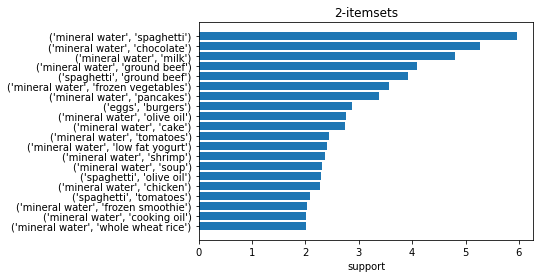

In [173]:
plt_data = a2[a2['support'] >= 1].sort_values('support')
plt_data['itemset'] = plt_data['itemset'].apply(str)
plt.barh(plt_data.itemset, plt_data.support)
plt.title("2-itemsets")
plt.xlabel('support')
#plt.ylabel('itemset')
plt.show()

#### we found 14 strong frequent 2-itemsets

Rules that satisfy both minimum-support threshold and minimun-confidence threshold are call <b>Strong</b>

In [174]:
l2 = c2[c2['support'] >= min_support]
l2_unique_items = list((set([x[0] for x in l2['itemset']] + [x[1] for x in l2['itemset']])))

In [175]:
l2.shape

(50, 6)

In [176]:
len(l2)


50

###### Number of frequent 2-itemsets are 165
### Now generate 3-itemsets

In [177]:
k3_items = list(combinations(list(l2_unique_items), 3))
print(len(k3_items))

1330


In [178]:
counts3 = []
for item in k3_items:
    counts3.append((df[item[0]]*df[item[1]]*df[item[2]]).sum())

In [179]:
c3 = pd.DataFrame()
c3['itemset'] = k3_items
c3['counts'] = counts3
c3['support'] = (c3.counts/N) * 100

In [180]:
def find_itemset(itemset):
    for i, r in l2.iterrows():
        if len(set(itemset) - set(r['itemset'])) == 0:
            return r['counts']
        else:
            return 0
        break
len(counts)

1378

##### Same approach is being used for confidence calculation for 3-itemset

In [181]:
xyz_conf = []
yzx_conf = []
zxy_conf = []
for i, r in c3.iterrows():
    if find_itemset(r['itemset'][0:2]) == 0:
        xyz_conf.append(0)
    else:
        xyz_conf.append((r['counts']/find_itemset(r['itemset'][0:2]))*100)
    
    if find_itemset(r['itemset'][1:]) == 0:
        yzx_conf.append(0)
    else:
        yzx_conf.append((r['counts']/find_itemset(r['itemset'][1:]))*100)
        
    if find_itemset(r['itemset'][::2]) == 0:
        zxy_conf.append(0)
    else:
        zxy_conf.append((r['counts']/find_itemset(r['itemset'][::2]))*100)

In [182]:
c3['confidence xy->z'] = xyz_conf
c3['confidence yz->x'] = yzx_conf
c3['confidence zx->y'] = zxy_conf

In [183]:
c3['max_confidence'] = c3[['confidence xy->z','confidence yz->x','confidence zx->y']].max(axis=1)

In [184]:
c3[c3['support'] >= 1].shape

(17, 7)

In [185]:
#c3[c3['support'] >= 1]
#c3[c3['max_confidence']>0]

In [186]:
#c3[c3['max_confidence']>0]
#c3.head()

###### Number of frequent 3-itemsets are 17

In [187]:
#x=c3[c3['support'] >= 1]
#c3

Text(0.5, 0, 'support')

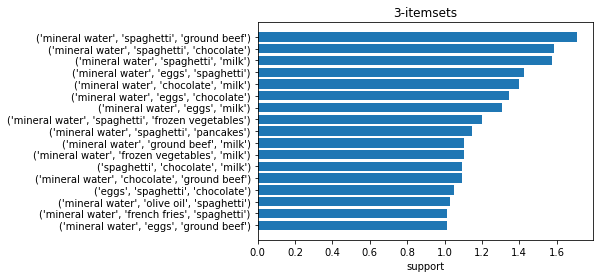

In [188]:
plt_data = c3[c3['support'] >= 1].sort_values('support')
plt_data['itemset'] = plt_data['itemset'].apply(str)
plt.barh(plt_data.itemset, plt_data.support)
plt.title("3-itemsets")
plt.xlabel('support')
#plt.ylabel('itemset')

##### Now we have calculated frequent itemsets by manually, now we will try MLXtend library  and compare both the results
### Let us use MLXtend library to generate and evaluate rules

In [189]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth, association_rules

In [190]:
# filling null values with string "ZERO"
dataset = data.fillna("ZERO")

In [191]:
# using TransactionEncoder to encode items data to True/False
encoding = TransactionEncoder()
encoding.fit(dataset.values)
encoded_data = encoding.transform(dataset.values)

In [192]:
# converting transformed values to pandas DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoding.columns_)

In [193]:
# removing the ZERO column
encoded_df.drop('ZERO', axis=1, inplace=True)

In [194]:
frequent_itemsets = apriori(encoded_df, min_support=0.01, use_colnames=True, max_len=4)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [195]:
frequent_itemsets.groupby("length").count()

,support,itemsets
length,,
1,75,75
2,165,165
3,17,17


##### Above table describes the frequent itemsets 1, 2, 3

### Now we will use FP Growth algorithm with same parameters and compare the results

In [196]:
frequent_itemsets = fpgrowth(encoded_df, min_support=0.01, use_colnames=True, max_len=4)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [197]:
frequent_itemsets.groupby("length").count()

,support,itemsets
length,,
1,75,75
2,165,165
3,17,17


###### FP Growth algorithm gives same results as Apriori. But main advantage of FP growth is, its faster and memory efficient

In [198]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [199]:
rules.shape

(406, 9)

In [200]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(spaghetti),(green tea),0.174110,0.132116,0.026530,0.152374,1.153335,0.003527,1.023900
1,(green tea),(spaghetti),0.132116,0.174110,0.026530,0.200807,1.153335,0.003527,1.033405
2,(french fries),(green tea),0.170911,0.132116,0.028530,0.166927,1.263488,0.005950,1.041786
3,(green tea),(french fries),0.132116,0.170911,0.028530,0.215943,1.263488,0.005950,1.057436
4,(chocolate),(green tea),0.163845,0.132116,0.023464,0.143206,1.083943,0.001817,1.012944


In [201]:
len(rules)

406

######  we have 406 rules in total itemsets whicch qualify lift

###### We need to filter-out the relevent rules based on our min_support and min_confidence

In [202]:
rules[ (rules['confidence'] > 0.35) &
       (rules['support'] > 0.01) ].reset_index()
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(spaghetti),(green tea),0.174110,0.132116,0.026530,0.152374,1.153335,0.003527,1.023900
1,(green tea),(spaghetti),0.132116,0.174110,0.026530,0.200807,1.153335,0.003527,1.033405
2,(french fries),(green tea),0.170911,0.132116,0.028530,0.166927,1.263488,0.005950,1.041786
3,(green tea),(french fries),0.132116,0.170911,0.028530,0.215943,1.263488,0.005950,1.057436
4,(chocolate),(green tea),0.163845,0.132116,0.023464,0.143206,1.083943,0.001817,1.012944
5,(green tea),(chocolate),0.132116,0.163845,0.023464,0.177598,1.083943,0.001817,1.016724
6,(green tea),(eggs),0.132116,0.179709,0.025463,0.192735,1.072479,0.001721,1.016135
7,(eggs),(green tea),0.179709,0.132116,0.025463,0.141691,1.072479,0.001721,1.011156
8,(low fat yogurt),(mineral water),0.076523,0.238368,0.023997,0.313589,1.315565,0.005756,1.109585
9,(mineral water),(low fat yogurt),0.238368,0.076523,0.023997,0.100671,1.315565,0.005756,1.026851


In [203]:
len(rules)

406

###### Now lets calculate Support and Confidence for different values to see the variations in the results 
Minimum Support = 1%

In [204]:
frequent_itemsets3 = fpgrowth(encoded_df, min_support=0.01, use_colnames=True, max_len=4)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))
frequent_itemsets3.groupby("length").count()

,support,itemsets
length,,
1,75,75
2,165,165
3,17,17


In [205]:
#We got very less itemsets, lets try by reducing the support value

###### Minimum Support = 2%

In [206]:
frequent_itemsets2 = fpgrowth(encoded_df, min_support=0.02, use_colnames=True, max_len=4)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2.groupby("length").count()

,support,itemsets
length,,
1,53,53
2,50,50


###### There are no 3-itemsets with Minimum support value = 2%

###### Generating association rules with updated support and confidence
min_spport = 3% and min_confidence = 40%

In [207]:
rules1 = association_rules(frequent_itemsets3, metric="lift", min_threshold=1)
print("Number of rules: ", rules1.shape)
rules1[ (rules1['confidence'] > 0.4) &
       (rules1['support'] > 0.03) ].reset_index()

Number of rules:  (406, 9)


,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,335,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401


###### There is only one rule that satifies our support and confidence threshold, when s=3% and c=40%

### Ground beef --> Mineral water

In [208]:
#len(rules1)
rules1
#3.07/7501 * 100 = 0.040927

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(spaghetti),(green tea),0.174110,0.132116,0.026530,0.152374,1.153335,0.003527,1.023900
1,(green tea),(spaghetti),0.132116,0.174110,0.026530,0.200807,1.153335,0.003527,1.033405
2,(french fries),(green tea),0.170911,0.132116,0.028530,0.166927,1.263488,0.005950,1.041786
3,(green tea),(french fries),0.132116,0.170911,0.028530,0.215943,1.263488,0.005950,1.057436
4,(chocolate),(green tea),0.163845,0.132116,0.023464,0.143206,1.083943,0.001817,1.012944
5,(green tea),(chocolate),0.132116,0.163845,0.023464,0.177598,1.083943,0.001817,1.016724
6,(green tea),(eggs),0.132116,0.179709,0.025463,0.192735,1.072479,0.001721,1.016135
7,(eggs),(green tea),0.179709,0.132116,0.025463,0.141691,1.072479,0.001721,1.011156
8,(low fat yogurt),(mineral water),0.076523,0.238368,0.023997,0.313589,1.315565,0.005756,1.109585
9,(mineral water),(low fat yogurt),0.238368,0.076523,0.023997,0.100671,1.315565,0.005756,1.026851


#### Let us try to generate rules by using reduced support threshold


In [209]:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
print("Number of rules: ", rules2.shape)


Number of rules:  (94, 9)


In [210]:
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(spaghetti),(green tea),0.174110,0.132116,0.026530,0.152374,1.153335,0.003527,1.023900
1,(green tea),(spaghetti),0.132116,0.174110,0.026530,0.200807,1.153335,0.003527,1.033405
2,(french fries),(green tea),0.170911,0.132116,0.028530,0.166927,1.263488,0.005950,1.041786
3,(green tea),(french fries),0.132116,0.170911,0.028530,0.215943,1.263488,0.005950,1.057436
4,(chocolate),(green tea),0.163845,0.132116,0.023464,0.143206,1.083943,0.001817,1.012944
5,(green tea),(chocolate),0.132116,0.163845,0.023464,0.177598,1.083943,0.001817,1.016724
6,(green tea),(eggs),0.132116,0.179709,0.025463,0.192735,1.072479,0.001721,1.016135
7,(eggs),(green tea),0.179709,0.132116,0.025463,0.141691,1.072479,0.001721,1.011156
8,(low fat yogurt),(mineral water),0.076523,0.238368,0.023997,0.313589,1.315565,0.005756,1.109585
9,(mineral water),(low fat yogurt),0.238368,0.076523,0.023997,0.100671,1.315565,0.005756,1.026851


###### min_spport = 2%    and   min_confidence = 40%

In [211]:
rules2[ (rules2['confidence'] > 0.40) & (rules2['support'] > 0.02) ].reset_index()

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,15,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962
1,45,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
2,85,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
